In [ ]:
!unzip /content/Astro_dataset.zip

Archive:  /content/Astro_dataset.zip
  inflating: astrobin_images.json    
  inflating: dataset/-IUfboBheWxT_1000x380_A980idJC.jpg  
  inflating: dataset/-M5e12X2Q5EI_1000x380_xbRp3QXt.jpg  
  inflating: dataset/-pEellkHwtn4_1000x380_vZoR_sRJ.jpg  
  inflating: dataset/0CUJI5BswA7E_1000x380_uzdtusYZ.jpg  
  inflating: dataset/0DX_y-vxeYjy_1000x380_jlb-_TBs.jpg  
  inflating: dataset/0F4x5zGlIL3D_1000x380_pojERExl.jpg  
  inflating: dataset/0eqQg0fSgsWM_1000x380_MbIlY8Kq.jpg  
  inflating: dataset/0qoo7TputDzR_1000x380_l0EMP-3c.jpg  
  inflating: dataset/13PHH--TB9Kf_1000x380_vSCI38i1.jpg  
  inflating: dataset/18Tmz8f63N7M_1000x380_1k2AHhih.jpg  
  inflating: dataset/1CajJRg9CFj9_1000x380_xlt_E6c5.jpg  
  inflating: dataset/1Nxy7ZiCiQCr_1000x380_tsNLnCV_.jpg  
  inflating: dataset/1gMVb0KNP6B9_1000x380_Equ8HbIj.jpg  
  inflating: dataset/29jJDS1ZEcv-_1000x380_CFGxMAWS.jpg  
  inflating: dataset/2Pg0c9QZaZj9_1000x380_tSMDnqTN.jpg  
  inflating: dataset/2Shg_EDrpWVr_1000x380_q1n4oWKj.jpg

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [ ]:
def build_generator(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(256, input_shape=(latent_dim,)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(np.prod(input_shape), activation='tanh'))
    model.add(layers.Reshape(input_shape))
    return model

In [ ]:
def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    gan = models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

In [ ]:
def load_dataset(data_dir, target_size=(64, 64)):
    images = []
    file_names = os.listdir(data_dir)
    for file_name in file_names:
        # Load image
        image = load_img(os.path.join(data_dir, file_name), target_size=target_size)
        # Convert image to array
        image = img_to_array(image)
        # Normalize pixel values to the range [-1, 1]
        image = (image.astype(np.float32) - 127.5) / 127.5
        images.append(image)
    return np.array(images)

In [ ]:
data_dir = '/content/dataset'
input_shape = (64, 64, 3)  # Adjust based on your dataset
latent_dim = 100
epochs = 500
batch_size = 32

In [ ]:
dataset = load_dataset(data_dir)

In [ ]:
num_samples = dataset.shape[0]
num_batches = num_samples // batch_size

In [ ]:
discriminator = build_discriminator(input_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5))

In [ ]:
generator = build_generator(input_shape)
generator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5))

In [ ]:
gan = build_gan(generator, discriminator)

In [ ]:
for epoch in range(epochs):
    for batch in range(num_batches):
        # Sample real images from the dataset
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        real_images = dataset[start_idx:end_idx]

        # Generate fake images
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)

        # Train discriminator
        discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    print(f'Epoch: {epoch} / Discriminator Loss: {discriminator_loss} / Generator Loss: {generator_loss}')

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 16ms/step
Epoch: 45 / Discriminator Loss: 0.6778524816036224 / Generator Loss: 1.4352765083312988
1/1 [==============================] - 0s 17ms/step
Epoch: 46 / Discriminator Loss: 0.638102114200592 / Generator Loss: 1.9874825477600098
1/1 [==============================] - 0s 16ms/step
Epoch: 47 / Discriminator Loss: 0.718500554561615 / Generator Loss: 1.3370821475982666
1/1 [==============================] - 0s 17ms/step
Epoch: 48 / Discriminator Loss: 0.5806734263896942 / Generator Loss: 1.6131374835968018
1/1 [==============================] - 0s 16ms/step
Epoch: 49 / Discriminator Loss: 0.6148829460144043 / Generator Loss: 1.392868995666504
1/1 [==============================] - 0s 18ms/step
Epoch: 50 / Discriminator Loss: 0.6060968041419983 / Generator Loss: 1.4555670022964478
1/1 [==============================] - 0s 29ms/step
Epoch: 51 / Discriminator Loss: 0.5649349540472031 / Generat

In [ ]:
def plot_images(original_images, enhanced_images):
    num_examples = len(original_images)
    fig, axs = plt.subplots(2, num_examples, figsize=(15, 5))
    for i in range(num_examples):
        axs[0, i].imshow((original_images[i] + 1) / 2)  # Denormalize and plot original image
        axs[0, i].axis('off')
        axs[0, i].set_title('Original')
        axs[1, i].imshow((enhanced_images[i] + 1) / 2)  # Denormalize and plot enhanced image
        axs[1, i].axis('off')
        axs[1, i].set_title('Enhanced')
    plt.show()

1/1 [==============================] - 0s 140ms/step


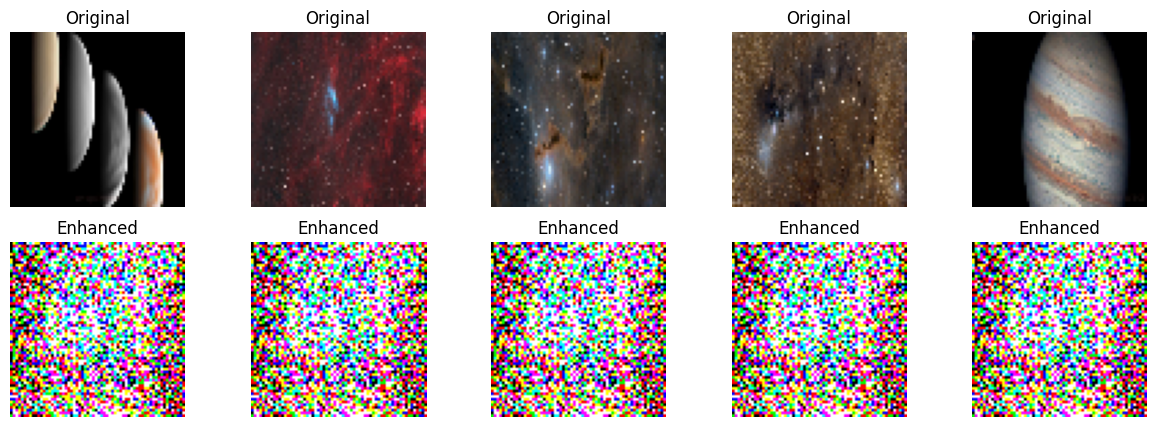

In [ ]:
num_examples = 5  # Choose how many images to generate
noise = np.random.normal(0, 1, (num_examples, latent_dim))
enhanced_images = generator.predict(noise)

# Plot images
plot_images(dataset[:num_examples], enhanced_images)